#### Задача 5.1

In [6]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as sps
import scipy.integrate as integrate

%matplotlib inline

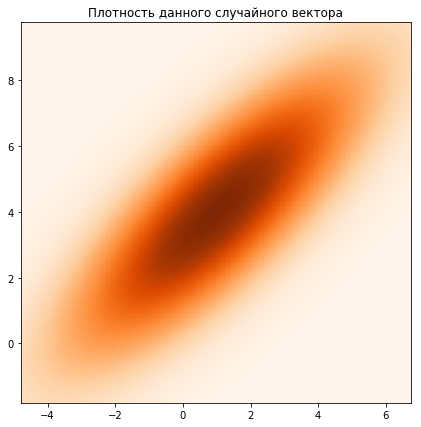

In [7]:
mean = (1, 4)
cov = ( (10, 8), (8, 10) )

grid = np.mgrid[-5:7:0.05, -2:10:0.05]
density = np.array([[sps.multivariate_normal.pdf((grid[0, i, j], grid[1, i, j]), 
                                                  mean, cov)
                        for j in range(grid[1].shape[1])]
                    for i in range(grid[0].shape[0])])

plt.figure(figsize=(7, 7))

plt.pcolormesh(grid[0], grid[1], density, cmap='Oranges')
plt.xlim((np.min(grid[0]) + 0.2, np.max(grid[0]) - 0.2))
plt.ylim((np.min(grid[1]) + 0.2, np.max(grid[1]) - 0.2))
plt.title("Плотность данного случайного вектора")

plt.show()

Построим графики условной плотности  $f_{\xi_1|\,\xi_2} \left(x|y\right) = \frac{f_{(\xi_1, \xi_2)}(x, y)}{f_{\xi_2}(y)}$

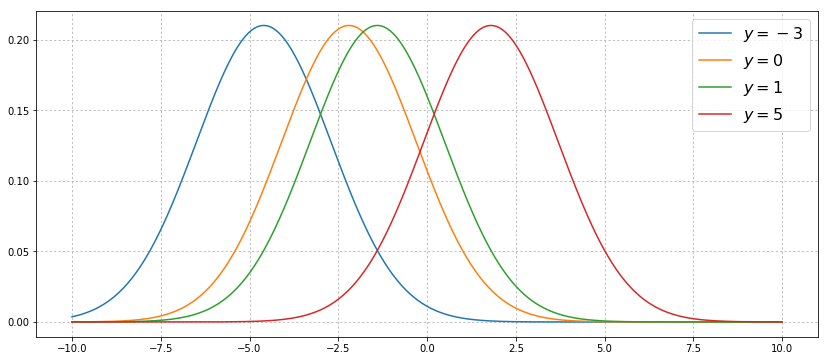

In [8]:
#совместная плотность
def joint_density(x, y, mean, cov):
    return np.array([sps.multivariate_normal.pdf([i,y], mean, cov)
                        for i in x])

#плотность условия
def marginal_density(y, mean, cov):
    return sps.norm.pdf(y, mean[1], np.sqrt(cov[1][1]))

#условная плотность
def conditional_density(x, y, mean, cov):
    return joint_density(x, y, mean, cov) / marginal_density(y, mean, cov)

y_set = (-3, 0, 1, 5)

grid = np.linspace(-10, 10, 2000)

plt.figure(figsize=(14,6))
for y in y_set:
    plt.plot(grid, conditional_density(grid, y, mean, cov), label='$y= ' + 
                                                            str(y) +'$')
plt.legend(fontsize=16)
plt.grid(ls=':')
plt.show()

Условная плотность $f_{\left.\xi_1\right|\xi_2} \left(x\left|y\right.\right)$ похожа на плотность нормального распределения, причем с одинаковой дисперсией.

Построим $E(\xi_1|\,\xi_2=y) = \int\limits_R x \cdot f_{\xi_1|\,\xi_2} \left(x|y\right) dx:$

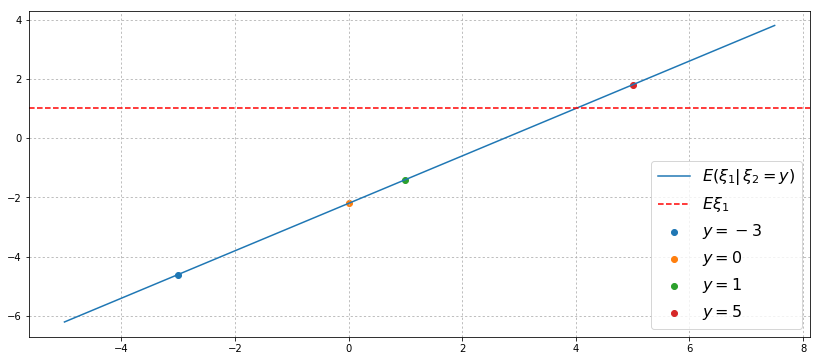

In [9]:
def joint_density_unit(x, y, mean, cov):
    return sps.multivariate_normal.pdf([x,y], mean, cov)

def conditional_density(x, y, mean, cov):
    return joint_density_unit(x, y, mean, cov) / marginal_density(y, mean, cov)

#условное математическое ожидание - берем только вычисленное значение
def conditional_expectation(y, mean, cov):
    return (integrate.quad(lambda x: x * conditional_density(x, y, mean, cov), 
                           -np.inf, np.inf))[0]

y_grid = np.linspace(-5, 7.5, 100)
cond_expect = np.array([conditional_expectation(y, mean, cov)
                       for y in y_grid])

plt.figure(figsize=(14,6))
#условное математическое ожидание взавиcимости от y
plt.plot(y_grid, cond_expect, label=r'$E(\xi_1|\,\xi_2=y)$')
#значения на предложенных y
for y in y_set:
    plt.scatter(y, conditional_expectation(y, mean, cov), label='$y= '
                                                          + str(y) +'$')
#матож для \xi_1
plt.axhline(y=mean[0], color='r', linestyle='--', label=r'$E\xi_1$')
plt.legend(fontsize=16)
plt.grid(ls=':')
plt.show()
    

$\xi_1 = \alpha\,\xi_2 + z$, где $cov(z, \xi_2) = 0$

$cov(z, \xi_2) = cov(\xi_1, \xi_2) - \alpha\,cov(\xi_2, \xi_2) = 8 - 10\,\alpha = 0$ $\Rightarrow$ $\alpha = \frac{4}{5}$

$E(\xi_1|\,\xi_2) = E(\alpha\,\xi_2 + z|\xi_2) = \alpha\,\xi_2 + E(z) = \frac{4}{5}\alpha - \frac{11}{5}$

Получившаяся зависимость совпала с таковой на графике.